In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import pandas_datareader as data

In [2]:
start = '2010-01-01'
end = '2021-12-31'

df = data.DataReader('VGT', 'yahoo', start, end)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-12-27,466.100006,457.959991,457.959991,466.100006,512300.0,466.100006
2021-12-28,467.059998,461.579987,466.829987,462.839996,518400.0,462.839996
2021-12-29,464.559998,460.049988,462.700012,462.880005,366600.0,462.880005
2021-12-30,465.059998,460.019989,462.799988,460.459991,334500.0,460.459991
2021-12-31,461.369995,457.910004,460.339996,458.170013,400100.0,458.170013


In [3]:
df.isna().any()

High         False
Low          False
Open         False
Close        False
Volume       False
Adj Close    False
dtype: bool

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3021 entries, 2010-01-04 to 2021-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       3021 non-null   float64
 1   Low        3021 non-null   float64
 2   Open       3021 non-null   float64
 3   Close      3021 non-null   float64
 4   Volume     3021 non-null   float64
 5   Adj Close  3021 non-null   float64
dtypes: float64(6)
memory usage: 165.2 KB


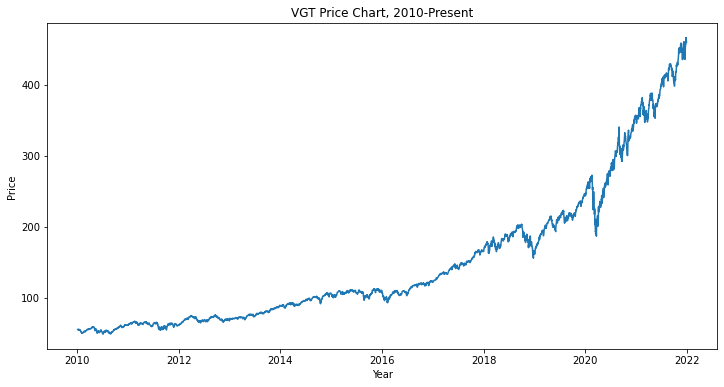

In [12]:
plt.figure(figsize = (12,6))

plt.plot(df['Open'])
plt.title('VGT Price Chart, 2010-Present')
plt.xlabel('Year')
plt.ylabel('Price');

In [13]:
df.rolling(7).mean().head(20)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-11,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-12,55.641429,55.048571,55.435714,55.361428,257871.428571,49.252574
2010-01-13,55.552858,54.888572,55.334286,55.275714,264000.000000,49.176318
2010-01-14,55.524286,54.832857,55.235714,55.248571,232257.142857,49.152169


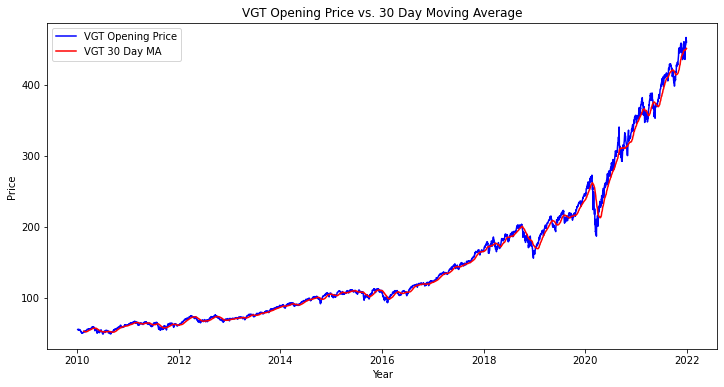

In [28]:
plt.figure(figsize = (12,6))
plt.plot(df['Open'], 'b', label = "VGT Opening Price")
plt.plot(df.rolling(window = 30).mean()['Close'], 'r', label = "VGT 30 Day MA")
plt.legend(loc = 'upper left')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('VGT Opening Price vs. 30 Day Moving Average');

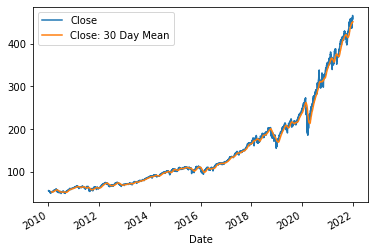

In [29]:
df['Close: 30 Day Mean'] = df['Close'].rolling(window = 30).mean()
df[['Close', 'Close: 30 Day Mean']].plot();

In [30]:
training_set = df['Open']
training_set = pd.DataFrame(training_set) 


In [31]:
# Feature Scaling 
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set) 

In [33]:
training_set.shape

(3021, 1)

In [34]:
# Creating a data structure with 15 timesteps and 1 output

x_train = []
y_train = []

for i in range(15, len(training_set_scaled)): 
    x_train.append(training_set_scaled[i-15:i, 0])
    y_train.append(training_set_scaled[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train) 

# Reshaping 
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [35]:
# Part 2 - Building the RNN

# Importing the Keras Libraries and packages

from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import LSTM 
from keras.layers import Dropout

2022-02-22 21:37:25.808919: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-22 21:37:25.808957: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [36]:
# Initializing the RNN
regressor = Sequential()

2022-02-22 21:37:43.430457: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-02-22 21:37:43.430502: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-02-22 21:37:43.430535: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jupyter-colinfitzgerald): /proc/driver/nvidia/version does not exist
2022-02-22 21:37:43.431030: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [37]:
# Adding the first LSTM Layer and some Dropout Regularization
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM Layer and some Dropout Regularization
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM Layer and some Dropout Regularization
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM Layer and some Dropout Regularization 
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output Layer
regressor.add(Dense(units = 1))

In [38]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(x_train, y_train, epochs = 100, batch_size = 32)

2022-02-22 21:43:40.330587: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
94/94 [==============================] - 14s 58ms/step - loss: 0.0097
Epoch 2/100
94/94 [==============================] - 6s 66ms/step - loss: 0.0015
Epoch 3/100
94/94 [==============================] - 6s 63ms/step - loss: 0.0016
Epoch 4/100
94/94 [==============================] - 6s 64ms/step - loss: 0.0013
Epoch 5/100
94/94 [==============================] - 6s 60ms/step - loss: 0.0012
Epoch 6/100
94/94 [==============================] - 6s 62ms/step - loss: 0.0011
Epoch 7/100
94/94 [==============================] - 6s 65ms/step - loss: 0.0012
Epoch 8/100
94/94 [==============================] - 6s 61ms/step - loss: 0.0012
Epoch 9/100
94/94 [==============================] - 6s 60ms/step - loss: 8.8747e-04
Epoch 10/100
94/94 [==============================] - 6s 64ms/step - loss: 9.8074e-04
Epoch 11/100
94/94 [==============================] - 6s 61ms/step - loss: 0.0011
Epoch 12/100
94/94 [==============================] - 6s 59ms/step - loss: 9.8477e-04
Epoch 13/100

In [40]:
start_test = '2022-01-01'
end_test = '2022-02-20'

df_test = data.DataReader('VGT', 'yahoo', start_test, end_test)
real_df_test = df_test.iloc[:, 1:2].values

In [42]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34 entries, 2022-01-03 to 2022-02-18
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       34 non-null     float64
 1   Low        34 non-null     float64
 2   Open       34 non-null     float64
 3   Close      34 non-null     float64
 4   Volume     34 non-null     int64  
 5   Adj Close  34 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 1.9 KB


In [43]:
test_set = df_test['Open']
test_set = pd.DataFrame(test_set) 

In [44]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34 entries, 2022-01-03 to 2022-02-18
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    34 non-null     float64
dtypes: float64(1)
memory usage: 544.0 bytes


In [47]:
df_total = pd.concat((df['Open'], df_test['Open']), axis = 0)
inputs = df_total[len(df_total) - len(df_test) - 15:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
x_test = []

for i in range(15, 49): 
    x_test.append(inputs[i - 15:i, 0])
x_test = np.array(x_test) 
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
predicted_stock_price = regressor.predict(x_test) 
predicted_stock_price = sc.inverse_transform(predicted_stock_price) 

In [48]:
predicted_stock_price = pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       34 non-null     float32
dtypes: float32(1)
memory usage: 264.0 bytes


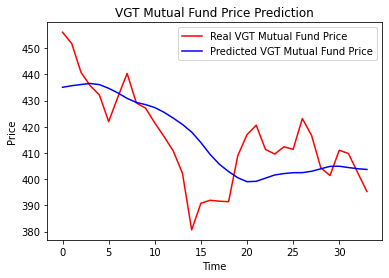

In [52]:
# Visualizing the results
plt.plot(real_df_test, 'r', label = 'Real VGT Mutual Fund Price')
plt.plot(predicted_stock_price, 'b', label = 'Predicted VGT Mutual Fund Price')
plt.title('VGT Mutual Fund Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend();